In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from nltk.corpus import stopwords

In [2]:
strategy = pd.read_excel("RAW_FCM__Problems_and_Strategies_7.1.2019.xlsx")
strategy.columns = strategy.iloc[1]
strategy = strategy.iloc[2:]

In [ ]:
#strategy.columns

In [4]:
strategy = strategy.rename(columns={'FCM: GRYD Client ID':'ID',
                                    'Description of targeted problem/issue_703': 'Problem',
                                    'Strategy recommended to address this problem_928':'Strategy',
                                    'Progress made? (select one)_934':'Progress'})
strategy = strategy.loc[:,['ID','Problem','Strategy','Progress']]
strategy = strategy.dropna()

In [5]:
strategy.head()

1,ID,Problem,Strategy,Progress
5,77th 1-16-40-2,wants to expunge her record,CM will contact past employers with client to ...,Task/Service successfully completed
6,77th 1-16-45-1,needs a job client is a foster kid and her fos...,speak to teacher about mother and refer client...,Task/Service successfully completed
7,77th 1-16-47-2,has poor grades and want to get better grades,CM will work on getting tutoring services alon...,N/A - not applicable to this phase
8,77th 1-16-50-2,client don't believe in herself,to mentor client with basic life skills and se...,A Little progress
13,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,referred him to in-house services through SEA ...,A Little progress


In [6]:
len(strategy)

4039

In [7]:
df = strategy

In [8]:
prob_list = df['Problem'].tolist()
prob_list = [s.lower() for s in prob_list]
df['Problem'] = prob_list

In [9]:
df.Problem.value_counts()

client requested assistance with employment search                                                                                                                   109
client requires consistent contact from cm/ciw to navagate interpersonal relationships and avoid potential problems with street affiliations                          34
client requires consistent contact with cm/ciw to navagate interpersonal relationships and avoid potential problems with street affiliations                          33
peer pressure                                                                                                                                                         25
anger issues                                                                                                                                                          23
                                                                                                                                                           

In [10]:
from string import punctuation
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [11]:
def normalize(contents):
    
    for i in range (len(contents)):
        contents[i]=contents[i].replace(",", " ")
    all_contents = [''.join([c for c in i if not c.isdigit()]) for i in contents]
    all_contents = [''.join([c for c in i if c not in punctuation]) for i in contents]
        
    lem_texts = []
    lemmatizer = WordNetLemmatizer()
    for i in all_contents:
        lem_texts.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(i)])
    new_texts = [' '.join([c for c in i]) for i in lem_texts] # a list of lemmatized sentences
    
    clean_tokens = list()
    sw = stopwords.words('english')
    other = ['client','clt','ct','need','request','require','want', 'would', 'like',
             '100', '12','week','13','year','14','18','1yr','20','hr','3yr','check',
             '40','50','70','75','80','10','1012','2018','25','community','hour','30']
    sw = sw + other
    for i in range(0,len(new_texts)):
        clean_tokens.append(' '.join([w for w in word_tokenize(new_texts[i]) if w not in sw]))         
    return clean_tokens # a list of sentences without useless words

In [12]:
normalized_texts = normalize(df['Problem'].tolist())

In [13]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df.head()

1,ID,Problem,Strategy,Progress
5,77th 1-16-40-2,wants to expunge her record,CM will contact past employers with client to ...,Task/Service successfully completed
6,77th 1-16-45-1,needs a job client is a foster kid and her fos...,speak to teacher about mother and refer client...,Task/Service successfully completed
7,77th 1-16-47-2,has poor grades and want to get better grades,CM will work on getting tutoring services alon...,N/A - not applicable to this phase
8,77th 1-16-50-2,client don't believe in herself,to mentor client with basic life skills and se...,A Little progress
13,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,referred him to in-house services through SEA ...,A Little progress


In [14]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1,2))
# features are stored in X
X = tfidf.fit_transform(normalized_texts)

In [15]:
# feature names
terms = tfidf.get_feature_names()

In [16]:
terms

['aa',
 'aa class',
 'abandonment',
 'abide',
 'abide demand',
 'ability',
 'ability stay',
 'able',
 'absence',
 'abuse',
 'abuse activity',
 'abuse alcohol',
 'abuse class',
 'abuse issue',
 'abuse problem',
 'abuse workshop',
 'academic',
 'academic attendance',
 'academic behavior',
 'academic challenge',
 'academic motivation',
 'academic performance',
 'academic score',
 'academically',
 'academy',
 'access',
 'access high',
 'accord',
 'accord fight',
 'accord participant',
 'acquire',
 'acquire driver',
 'acquire high',
 'acquire work',
 'act',
 'act impulsively',
 'act know',
 'action',
 'action caught',
 'action make',
 'active',
 'active area',
 'active gang',
 'active member',
 'active negative',
 'active tag',
 'activity',
 'activity know',
 'activity life',
 'activity living',
 'addict',
 'addiction',
 'address',
 'admit',
 'admit affiliate',
 'admit drug',
 'adult',
 'adult school',
 'advise',
 'advisor',
 'affect',
 'affected',
 'affilaitions',
 'affiliate',
 'affiliate

In [17]:
tfidf_df = pd.DataFrame(X.todense(), 
                        columns=tfidf.get_feature_names())

In [18]:
tfidf_df.shape

(4039, 2716)

In [19]:
all(tfidf_df.iloc[16,:]==0)

False

In [20]:
row1 = tfidf_df.iloc[16,:]
row1[row1 != 0]

anger               0.503842
anger management    0.614464
management          0.607106
Name: 16, dtype: float64

Implementing K means clustering algorithm

In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

Find optimal number of clusters **k**

In [22]:
pca = PCA(n_components=2, random_state=25)
X_reduced= pca.fit_transform(X.toarray())
distortions = []
K = range(3, 10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=25).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

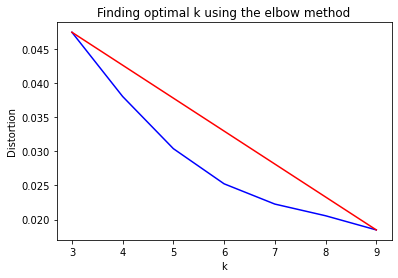

In [23]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# plot elbow method
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Finding optimal k using the elbow method')
plt.show()

In [24]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
tsne = TSNE(verbose=1, perplexity=100, random_state=25)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4039 samples in 0.341s...
[t-SNE] Computed neighbors for 4039 samples in 67.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4039
[t-SNE] Computed conditional probabilities for sample 2000 / 4039
[t-SNE] Computed conditional probabilities for sample 3000 / 4039
[t-SNE] Computed conditional probabilities for sample 4000 / 4039
[t-SNE] Computed conditional probabilities for sample 4039 / 4039
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.032661
[t-SNE] KL divergence after 1000 iterations: 1.839061


In [26]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

In [27]:
#order_centroids

In [28]:
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :8]:
        print(' %s' % terms[ind])

Cluster 0:
 probation
 school
 service
 assistance
 id
 job
 work
 currently
Cluster 1:
 look
 look employment
 employment
 look work
 work
 job
 currently look
 look get
Cluster 2:
 anger
 issue
 anger issue
 anger management
 management
 family issue
 family
 management class
Cluster 3:
 employment
 employment search
 assistance employment
 search
 assistance
 seek assistance
 seek
 assitance employment
Cluster 4:
 avoid
 street affiliation
 street
 problem street
 interpersonal
 affiliation
 navagate
 potential


In [29]:
y_pred = model.fit_predict(X)

In [30]:
len(y_pred)

4039

In [31]:
df['Problem_Classification'] = y_pred
#df.drop('Classification', axis=1, inplace=True)

In [32]:
df.Problem_Classification.value_counts()

0    2990
2     499
1     249
4     191
3     110
Name: Problem_Classification, dtype: int64

In [ ]:
#0: Emotional and behavior issues (peer pressure, anger management issues, family issues, toxic relationships, improper/anti-social behavior etc)
#1: Need assistance with employment search
#2: Need work ready documents/California id
#3: Need mentoring from CM/CIW to navigate interpersonal relationships and avoid potential problems with street affiliations
#4: Need assistance with school enrollment/improving school grades
#5: Need to complete community service hours for probation requirements

In [123]:
#df[df['Problem_Classification']==0]['Problem'].value_counts()

In [117]:
#labels = {0:'need service to navagate interpersonal relationship', 1:'need complete service', 
          #2:'employment related issue', 3:'need substance abuse class', 4:'anger issue',
          #5:'gang related issue'}
labels = {0:'Emotional/behavior issues', 
          1:'Need assistance with employment search', 
          2:'Need work ready documents/California id', 
          3:'Need mentoring to navigate interpersonal relationships',
          4:'Need assistance with school enrollment', 
          5:'Need to complete community service hours'}

In [130]:
# short label
labels = {0:'Emotional/behavior issues', 
          1:'Employment related issues', 
          2:'Lack work ready documents/CA ID', 
          3:'Interpersonal relationship issues',
          4:'School related issues', 
          5:'Probation related issues'}

In [ ]:
# DON'T RUN
labels = {0:"developmental asset", 1:"support/mentor", 2:"get ready for work/school", 
         3: "life skill/anger management", 4:"counseling (employment etc)",
         5:'substance abuse class',
         6: 'sixth',
         7:'seventh'}

In [132]:
df["Problem_Label"] = df["Problem_Classification"].map(labels)

In [133]:
df.head()

1,ID,Problem,Strategy,Progress,Problem_Classification,Problem_Label
5,77th 1-16-40-2,wants to expunge her record,CM will contact past employers with client to ...,Task/Service successfully completed,0,Emotional/behavior issues
6,77th 1-16-45-1,needs a job client is a foster kid and her fos...,speak to teacher about mother and refer client...,Task/Service successfully completed,0,Emotional/behavior issues
7,77th 1-16-47-2,has poor grades and want to get better grades,CM will work on getting tutoring services alon...,N/A - not applicable to this phase,0,Emotional/behavior issues
8,77th 1-16-50-2,client don't believe in herself,to mentor client with basic life skills and se...,A Little progress,0,Emotional/behavior issues
13,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,referred him to in-house services through SEA ...,A Little progress,0,Emotional/behavior issues


In [ ]:
color_dict = dict({'Emotional/behavior issues':'dodgerblue',
                  'Need assistance with employment search':'forestgreen',
                  'Need work ready documents/California id': 'orange',
                  'Need mentoring to navigate interpersonal relationships': 'springgreen',
                  'Need assistance with school enrollment': 'yellow',
                  'Need to complete community service hours': 'red'})

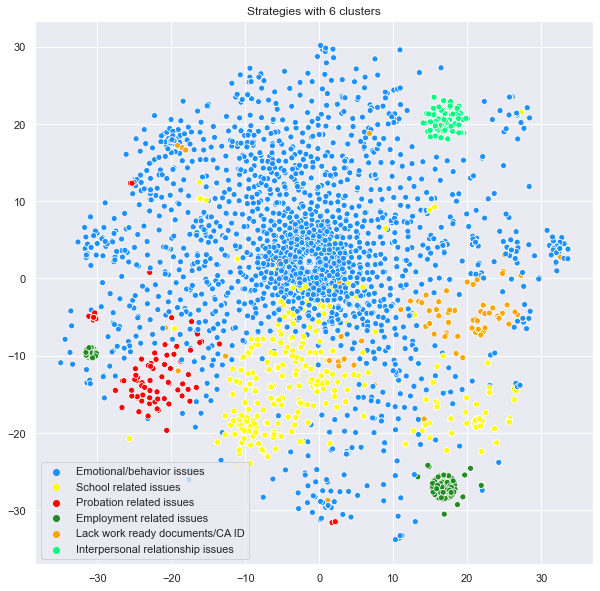

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
X_embedded_all = X_embedded

sns.set(rc={'figure.figsize':(10,10)})


color_dict = dict({'Emotional/behavior issues':'dodgerblue',
                  'Employment related issues':'forestgreen',
                  'Lack work ready documents/CA ID': 'orange',
                  'Interpersonal relationship issues': 'springgreen',
                  'School related issues': 'yellow',
                  'Probation related issues': 'red'})
                  #'sixth':'yellow',
        
                  


sns.scatterplot(X_embedded_all[:,0], X_embedded_all[:,1], hue=df['Problem_Label'].values, legend='full', palette=color_dict)
plt.title('Strategies with {} clusters'.format(k))
plt.show()

In [121]:
df.to_csv('Problems_and_Strategies_with_labels2.csv', index=False)

In [ ]:
df['Strategy_Label'].value_counts()